# Exploratory Data Analysis (EDA) of our dataset

### Dataset Charge

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Visual settings
sns.set_style("whitegrid")
sns.set_theme("notebook")
# sns.set_palette("colorblind")
pd.set_option('display.max_columns', None) # Ver todas las columnas

# Charge data
df = pd.read_csv('../data/raw/churn_ibm.csv')
print(f"Our data has {df.shape[0]} rows and {df.shape[1]} columns")

Our data has 1470 rows and 35 columns


In [29]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Description of variables


🎯 **Target Variable**

* **`Attrition`**: Indicates if the employee left the company (Yes/No). This is the label we aim to predict.

<br>

🗑️ **Features to Drop (Noise)**

These columns are removed because they provide no predictive value (they are constants or unique IDs).

* **`EmployeeCount`**: Always 1.

* **`Over18`**: Always 'Y'.

* **`StandardHours`**: Always 80.

* **`EmployeeNumber`**: Employee ID (random noise).

<br>

🔠 **Categorical Features**

Text variables that require transformation into numbers (One-Hot Encoding).

* **`BusinessTravel`**: Frequency of business trips.

* **`Department`**: Department (Sales, R&D, etc.).

* **`EducationField`**: Field of study.

* **`Gender`**: Employee gender.

* **`JobRole`**: Specific job position.

* **`MaritalStatus`**: Marital status.

* **`OverTime`**: Whether they work overtime (Highly influential variable).

<br>

🔢 **Numerical Features**

**1. Continuous and Count Variables:**

* **`Age`**: Employee age.

* **`DailyRate` / `HourlyRate` / `MonthlyRate`**: Billing/rate levels (cost by employee).

* **`DistanceFromHome`**: Distance between home and work.

* **`MonthlyIncome`**: Monthly salary.

* **`NumCompaniesWorked`**: Number of previous companies.

* **`PercentSalaryHike`**: Percentage of salary increase.

* **`TotalWorkingYears`**: Total years of career experience.

* **`TrainingTimesLastYear`**: Number of training courses last year.

* **`YearsAtCompany`**: Years at the current company.

* **`YearsInCurrentRole`**: Years in the current position.

* **`YearsSinceLastPromotion`**: Years since last promotion.

* **`YearsWithCurrManager`**: Years under the current manager.


**2. Ordinal Variables (Satisfaction/Evaluation Scales):**

* **`Education`**: Education level (1-5).

* **`EnvironmentSatisfaction`**: Satisfaction with the environment (1-4).

* **`JobInvolvement`**: Level of involvement (1-4).

* **`JobLevel`**: Hierarchy level (1-5).

* **`JobSatisfaction`**: Job satisfaction (1-4).

* **`PerformanceRating`**: Performance rating (1-4).

* **`RelationshipSatisfaction`**: Satisfaction with relationships (1-4).

* **`StockOptionLevel`**: Level of stock options received (0-3).

* **`WorkLifeBalance`**: Work-life balance (1-4).

### Key questions for EDA

Looking at the variables we have, I have been curious about the following questions to **understand better our dataset**:

* **Are people that travel a lot more satisfied in their jobs?**

* **Which field of study has the most income?**

* **People that earn more salary tend to be more satisfied?**

* **Which specific Job Role earns the most salary?**

* **Are them the ones with higher job satisfaction levels?**

* **Are the people with more years at the company the ones with more performance (as a measure of productivity)?**

* **Which are the roles with best Work-Life Balance?**


And taking into account our target, **Attrition**:

* **Does Attrition change by Gender?**

* **Do people who live further tend to go out of the company?**

* **Are people with low job satisfaction the ones that churn more?**

* **Which is the Job Role that churns the most?**

* **Are people with lower salaries churning more?**

* **Is a raise in the salary a key factor for retention?**

In [31]:
# List of all groups of variables
TARGET = "Attrition"

DROP_FEATURES = [
    "EmployeeCount", 
    "Over18", 
    "StandardHours", 
    "EmployeeNumber"
]

CATEGORICAL_FEATURES = [
    "BusinessTravel", 
    "Department", 
    "EducationField", 
    "Gender", 
    "JobRole", 
    "MaritalStatus", 
    "OverTime"
]

NUMERIC_FEATURES = [
    "Age", "DailyRate", "DistanceFromHome", "Education", 
    "EnvironmentSatisfaction", "HourlyRate", "JobInvolvement", 
    "JobLevel", "JobSatisfaction", "MonthlyIncome", "MonthlyRate", 
    "NumCompaniesWorked", "PercentSalaryHike", "PerformanceRating", 
    "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears", 
    "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", 
    "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"
]

df = df.drop(DROP_FEATURES, axis=1)
print(f"Now our dataset has {df.shape[1]} variables")

Now our dataset has 31 variables


### Data Validation

Preliminary check for Missing Values, Inconsistencies and Duplicates.

In [13]:
# Missing values
df.isna().sum().sort_values(ascending=False).rename("Sum of NaN")

Age                         0
MonthlyIncome               0
YearsSinceLastPromotion     0
YearsInCurrentRole          0
YearsAtCompany              0
WorkLifeBalance             0
TrainingTimesLastYear       0
TotalWorkingYears           0
StockOptionLevel            0
RelationshipSatisfaction    0
PerformanceRating           0
PercentSalaryHike           0
OverTime                    0
NumCompaniesWorked          0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
JobSatisfaction             0
JobRole                     0
JobLevel                    0
JobInvolvement              0
HourlyRate                  0
Gender                      0
EnvironmentSatisfaction     0
EducationField              0
Education                   0
DistanceFromHome            0
Department                  0
DailyRate                   0
BusinessTravel              0
YearsWithCurrManager        0
Name: Sum of NaN, dtype: int64

In [21]:
# Inconsistencies
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [20]:
# Duplicates
print(f"There are these number of duplicated candidates: {int(df.duplicated().any())}")

There are these number of duplicated candidates: 0


## Univariate Analysis

Here, we will inspect the most important variables in our dataser one by one, in order to study their distributions and detect possible patterns, outliers, skewness...

### Categorical Variables

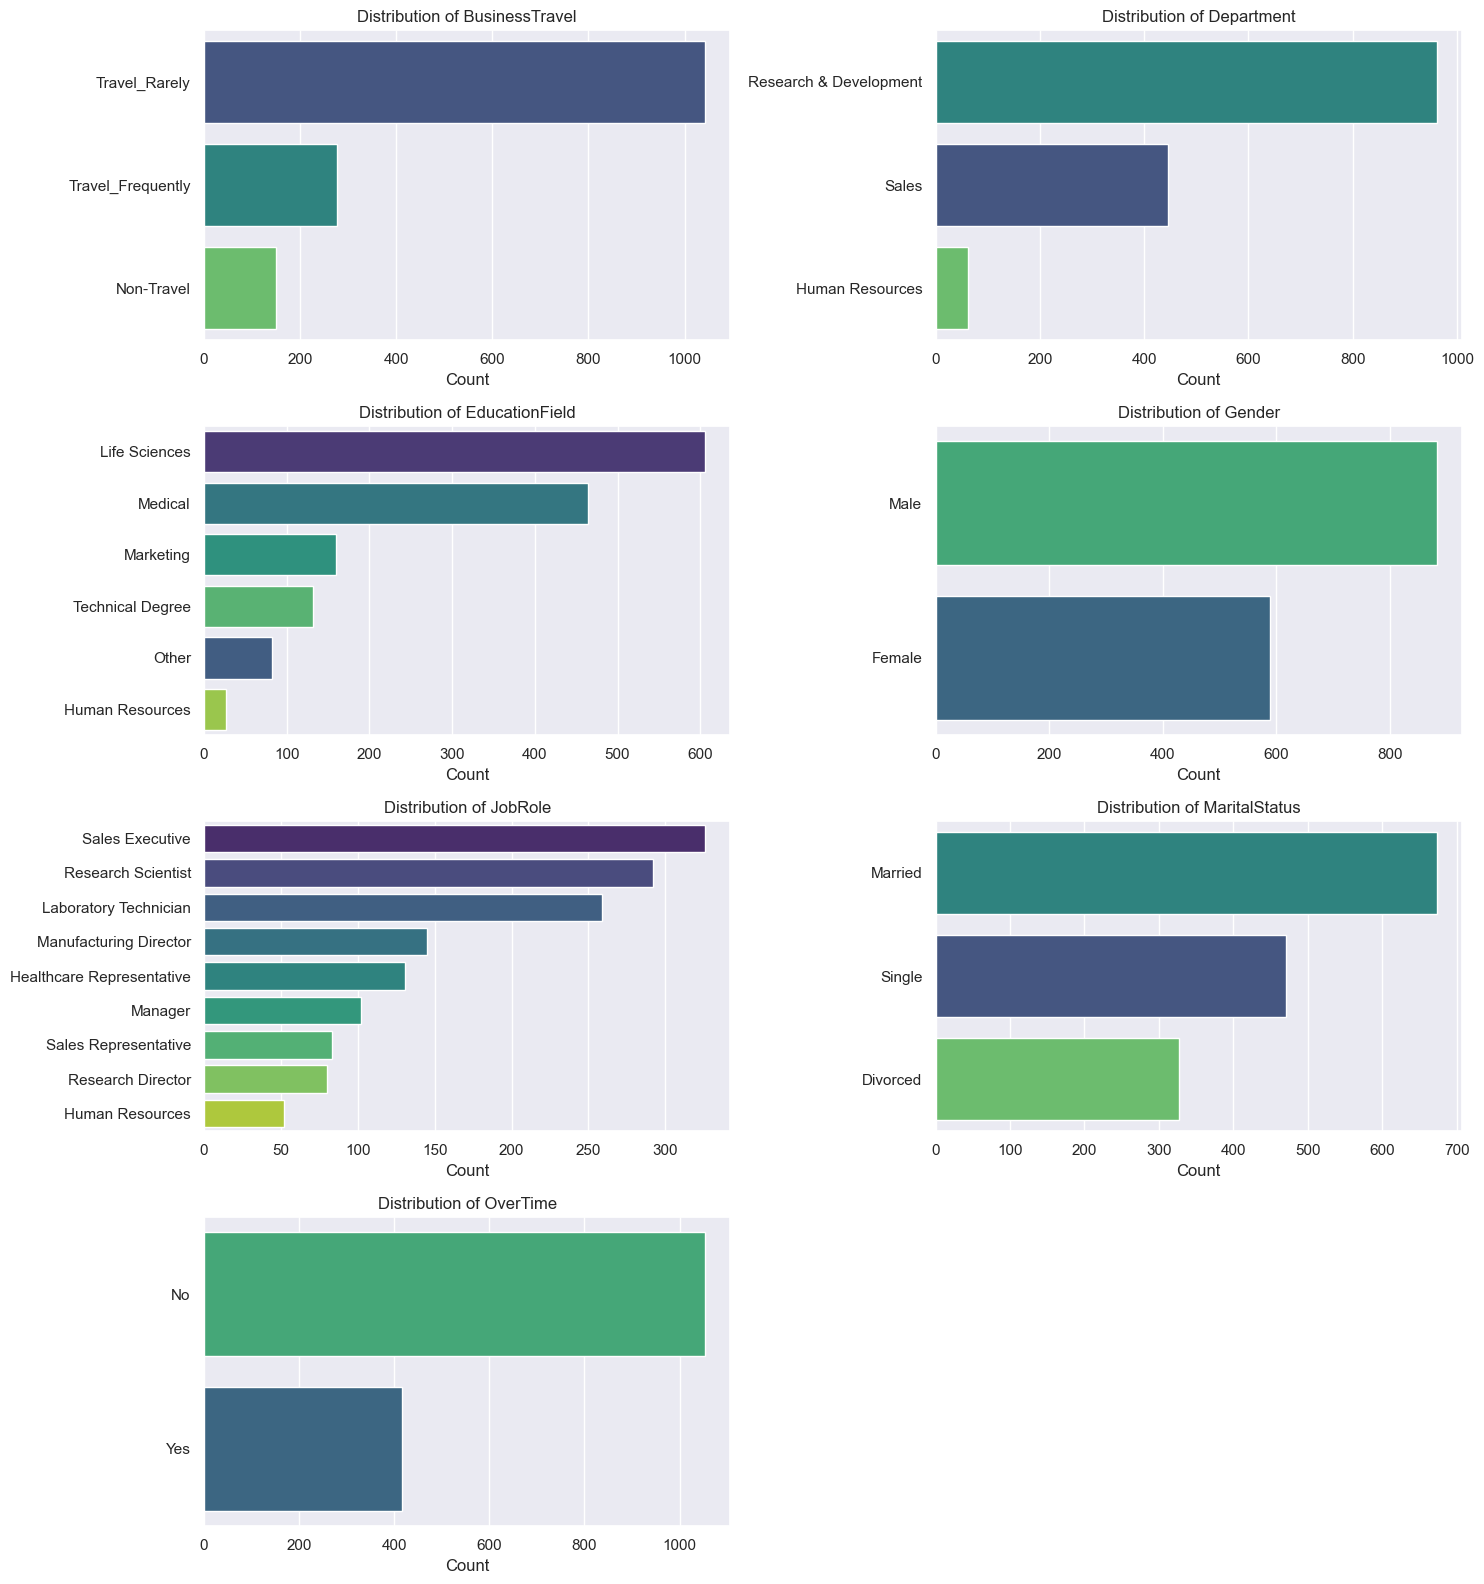

In [48]:
import math

# 1. Calculate layout (rows needed for 2 columns)
num_cols = 2
num_rows = math.ceil(len(CATEGORICAL_FEATURES) / num_cols)

# 2. Create the figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, cat in enumerate(CATEGORICAL_FEATURES):
    # 3. Plotting
    sns.countplot(
        y=cat, 
        data=df, 
        hue=cat,       # <--- FIX: Assign the same variable to hue
        legend=False,  # <--- FIX: Disable the redundant legend
        ax=axes[i], 
        order=df[cat].value_counts().index, # Sort bars by frequency
        palette="viridis"
    )
    
    # Formatting
    axes[i].set_title(f"Distribution of {cat}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("") # Remove y-label to save space

# 4. Remove empty subplots if the number of features is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can draw the following conclusions:

* `Business Travel`: there are only a few people who do not travel at any time.

* `Department`: this company has R&D as the main department, followed by sales and a bit of HR.

* `Education Field`: the most popular fields of education are Life Sciences and Medical, then Marketing, Technical, Other and HR.

* `Gender`: there are approximately a 60% of Male and 40% of Female in the company.

* `Job Role`: here, we can see that sales executive is the most performed role, followed closely by Research Scientist and Laboratory Technician.

* `Marital Status`: we can see a lot of Divorced people, while Married people are the favourite status in the company.

* `Over Time`: finally, there are more people that do not pass over time in the company, but there is an interesting percentage that does.

### Numeric Variables

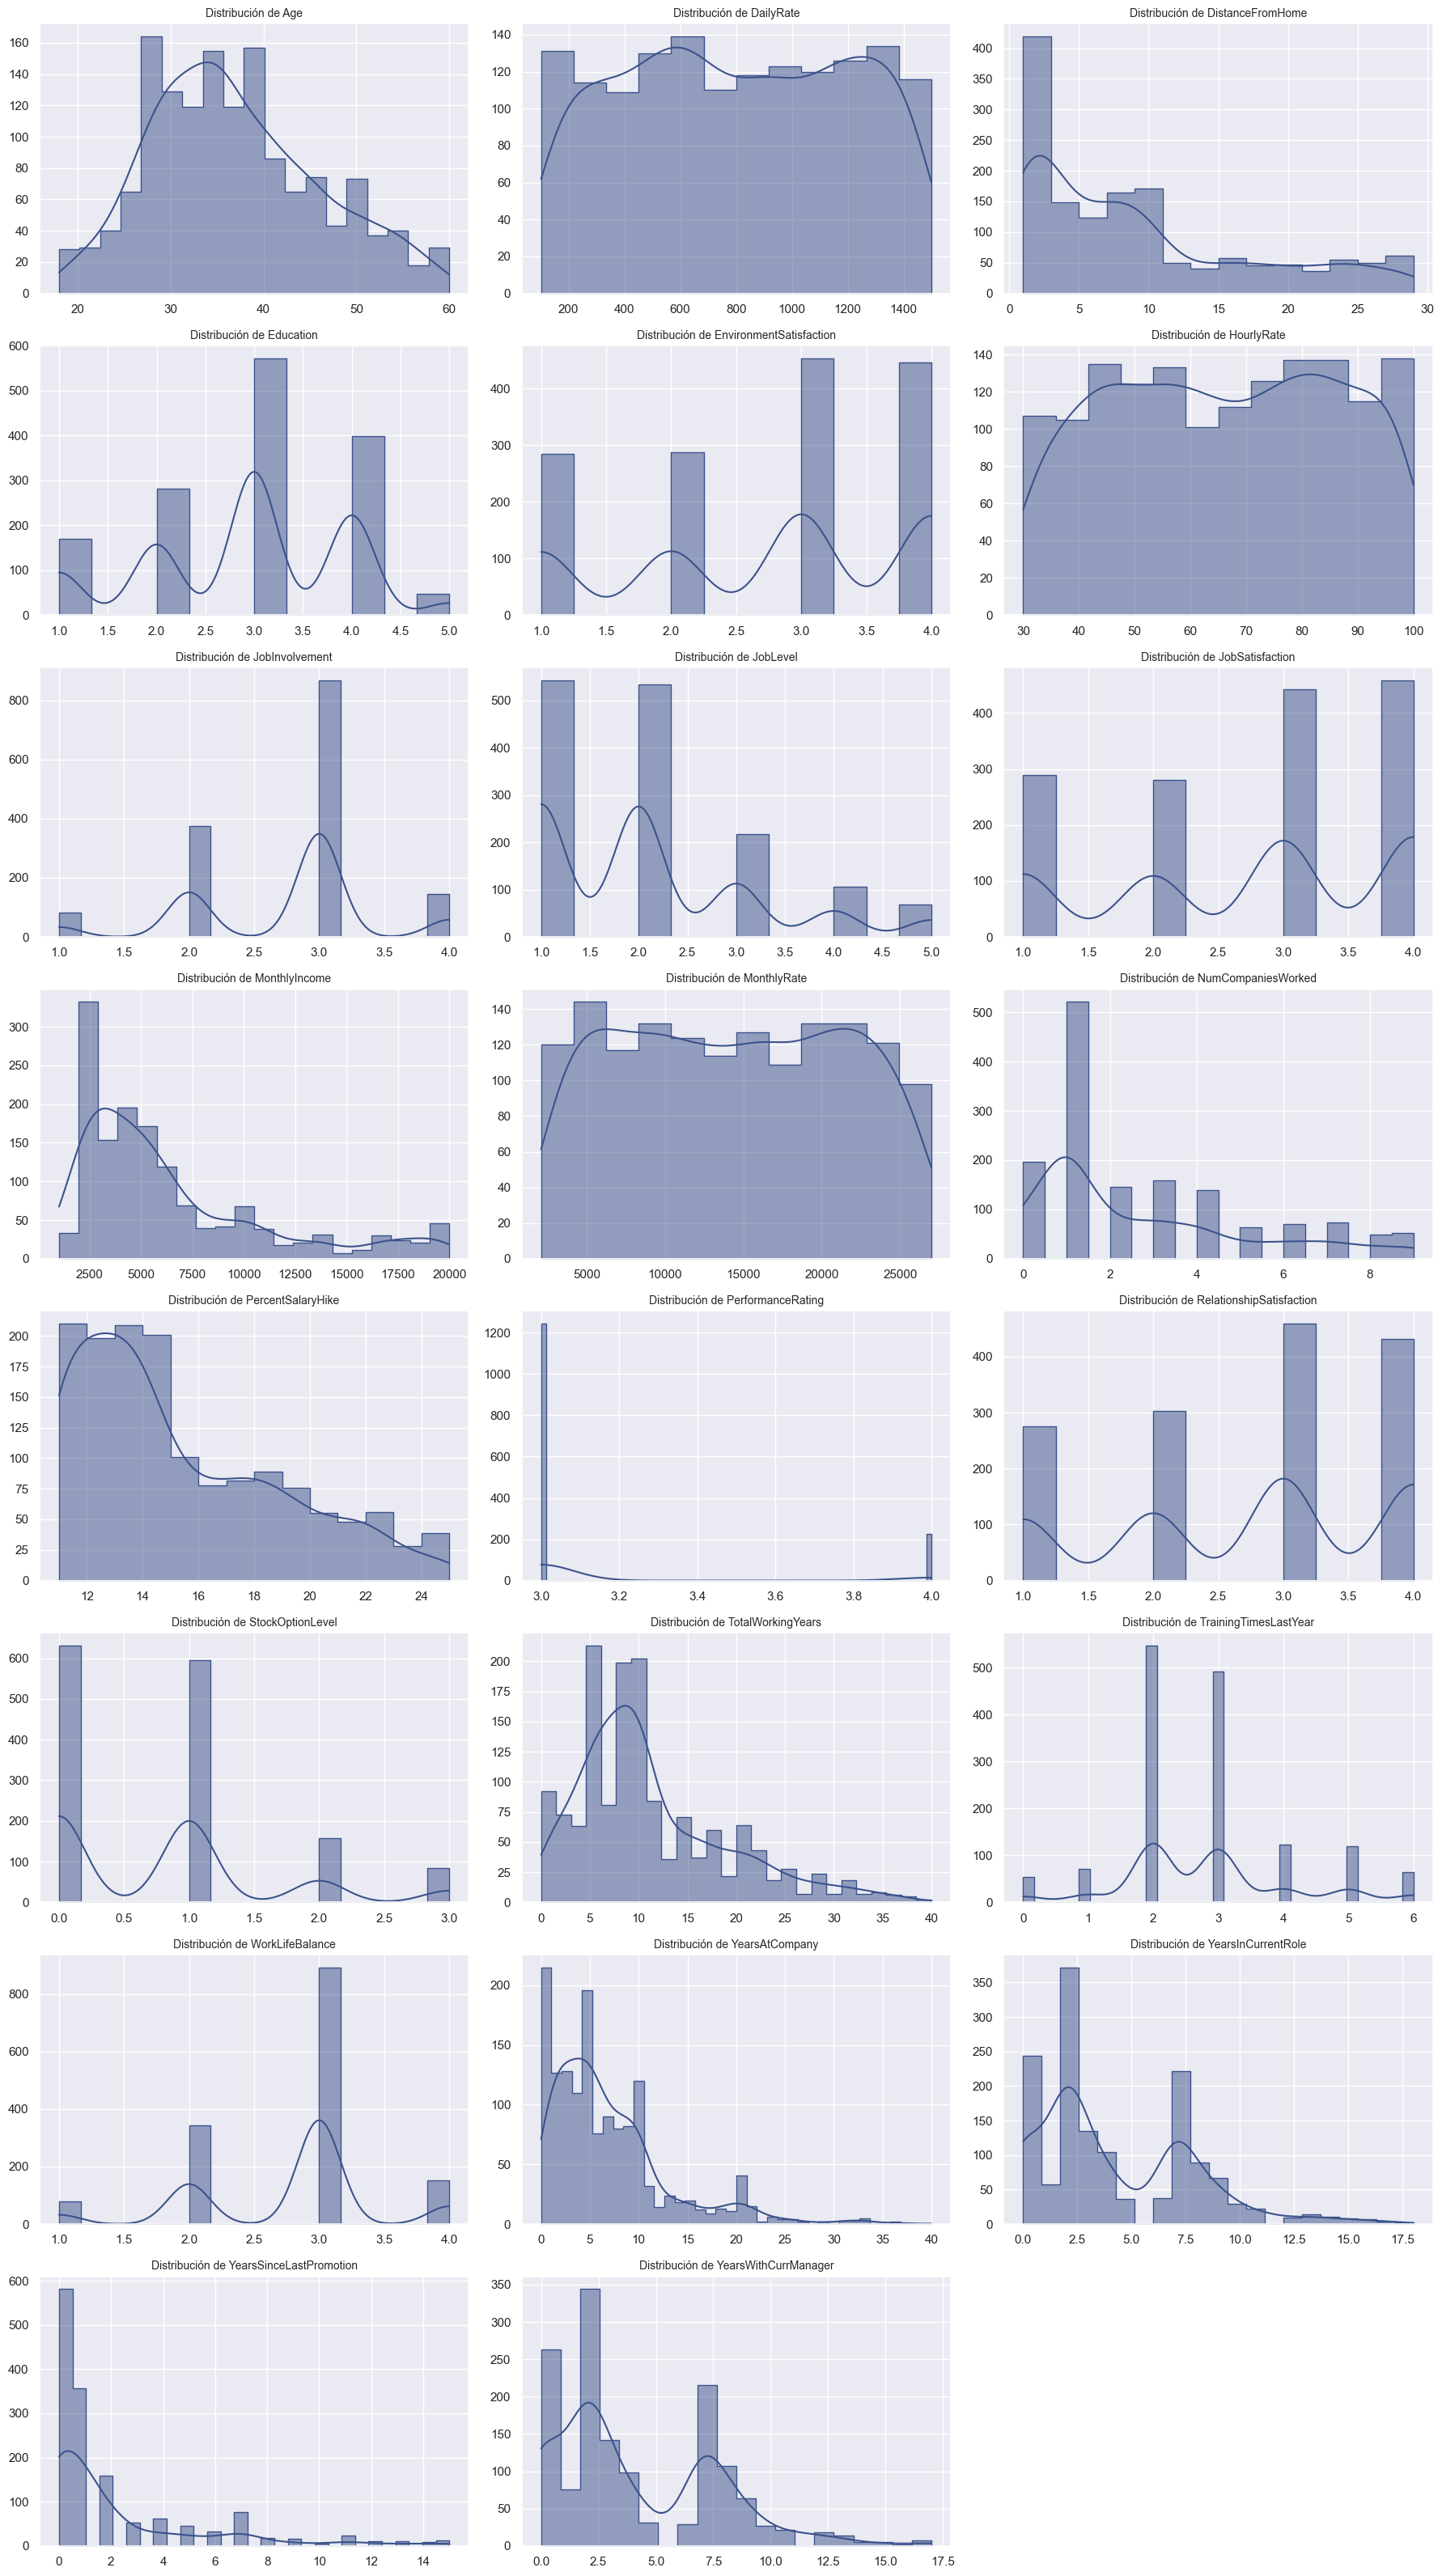

In [60]:
# 1. Grid Configuration
# 3 columns
num_cols = 3
num_rows = math.ceil(len(NUMERIC_FEATURES) / num_cols)

# 2. Create Figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten()

# 3. Itarate and Paint
for i, col in enumerate(NUMERIC_FEATURES):
    sns.histplot(
        data=df, 
        x=col, 
        kde=True,        
        element="step",  
        color="#3b528b", 
        ax=axes[i]
    )
    
    axes[i].set_title(f"Distribución de {col}", fontsize=10)
    axes[i].set_xlabel("") 
    axes[i].set_ylabel("") 

# 4. Eliminate empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Main conclusions:

* `Age` follows a standard **normal distribution**.

* `DailyRate`, `HourlyRate`, and `MonthlyRate` show **uniform distributions** (likely synthetic noise), suggesting they might not add unique value.

* `DistanceFromHome` and `MonthlyIncome` are **heavily right-skewed**, indicating a need for transformation (e.g., Log Scale) to handle outliers.

* `YearsInCurrentRole` and `YearsWithCurrManager` display **nearly identical distributions**, suggesting high multicollinearity. They reveal two distinct groups: new employees (0-5 years) and veterans (6-12 years).

* `PerformanceRating` only contains **two values (3 and 4)**. Due to this extremely low variance, it is a strong candidate to **DROP**.

* `PercentSalaryHike` concentrates between **10-15%**. Salary increases above 15% are still common but not as much.

* `YearsSinceLastPromotion` is **right-skewed**, indicating that long periods without promotion are rare (the company promotes frequentely).

* `YearsAtCompany` presents specific **spikes at 0, 5, and 10 years**. This suggests a "milestone effect" where employees stay to reach a specific tenure (vesting/contracts) before leaving.

* `Education` shows that **"Doctor" (5)** is the rarest level. The workforce is dominated by **Bachelors (3)** and **Masters (4)**.

* `JobSatisfaction` and `EnvironmentSatisfaction` share **similar distribution shapes**, implying these factors might be psychologically linked for employees.

* `Ordinal Variables` generally preserve the order well and provide significant information for the model.

## Bivariate Analysis
Here, we will inspect the **key questions** made at the beginning of the analysis in order to see patterns, relations and look for possible good or bad **predictors** of Attrition.

### Some curious relationships

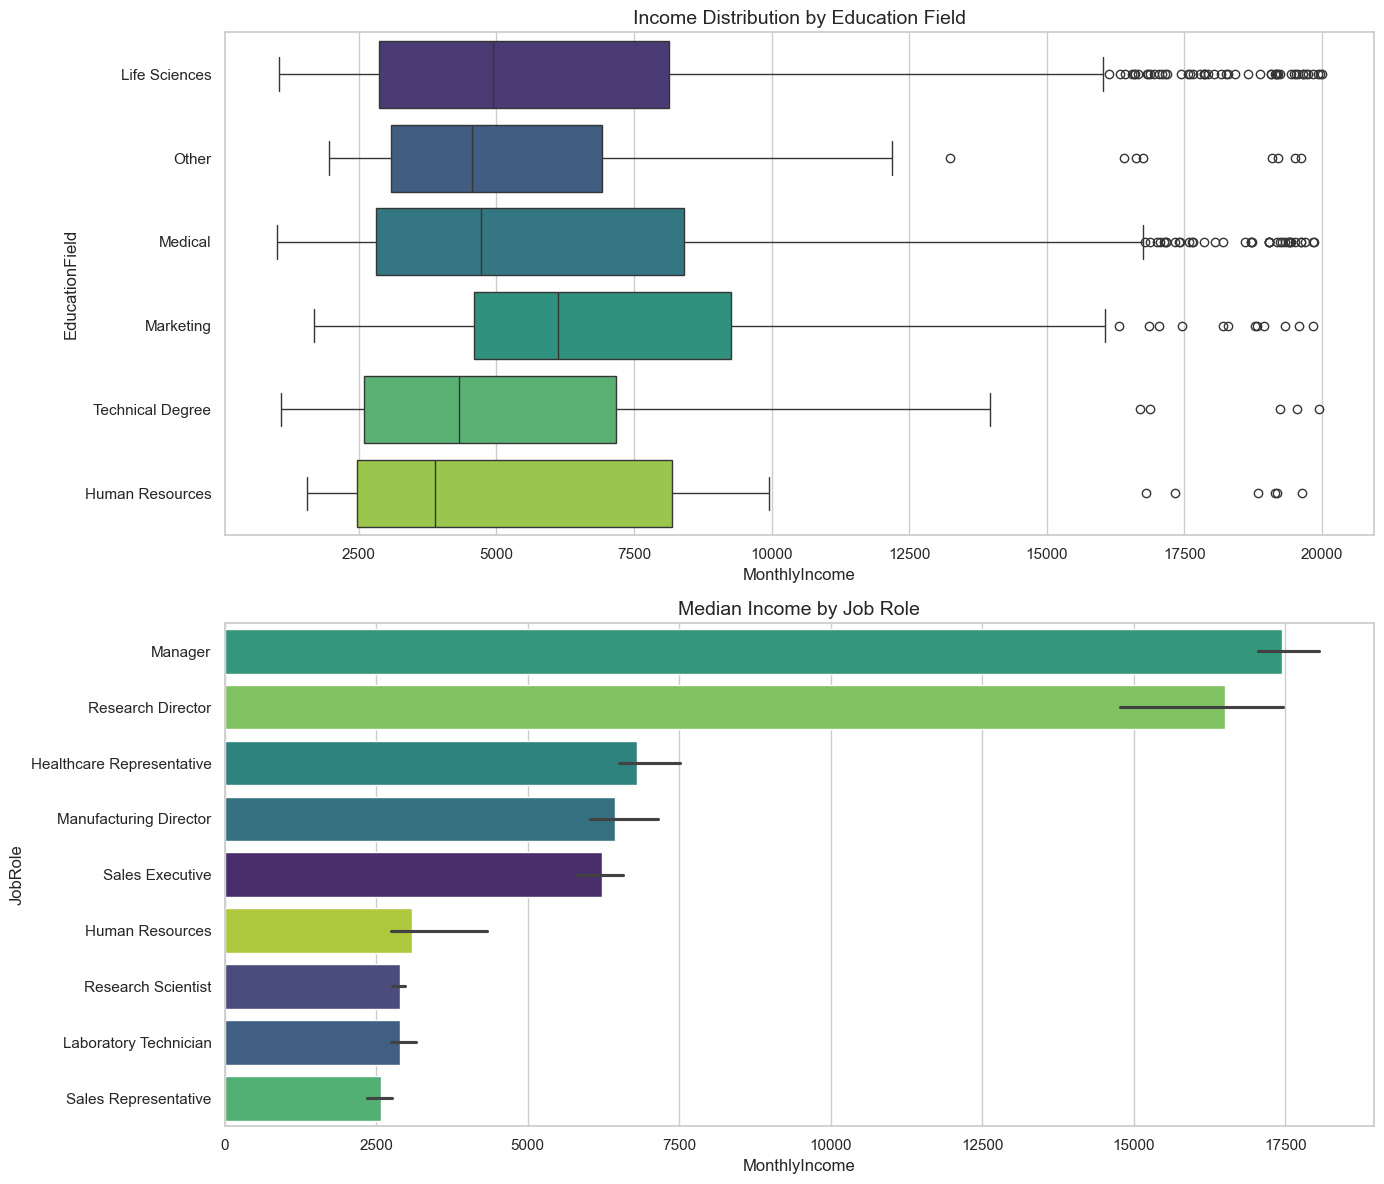

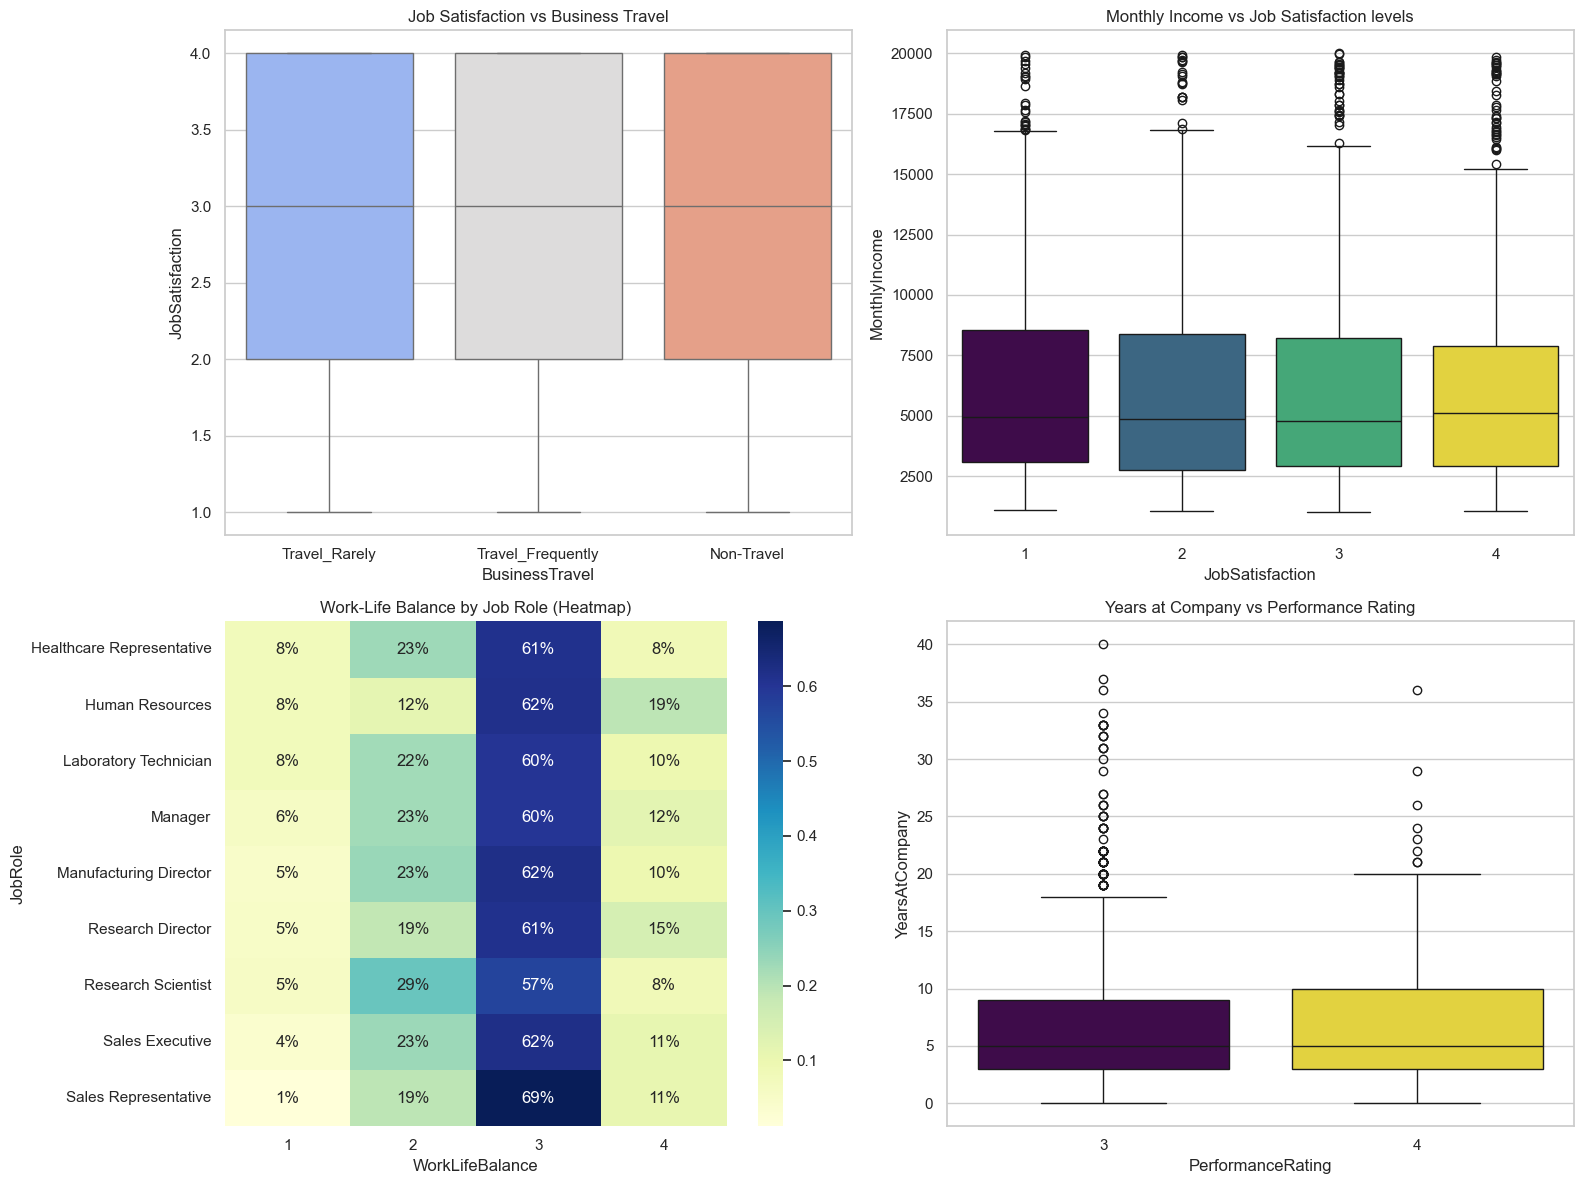

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 10)

# --- Q1 & Q2: Income Analysis by Field & Role ---
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# 1. Which Field of Study has the most Income?
sns.boxplot(
    data=df, 
    x="MonthlyIncome", 
    y="EducationField", 
    hue="EducationField",  # <--- FIX
    legend=False,          # <--- FIX
    ax=axes[0], 
    palette="viridis"
)
axes[0].set_title("Income Distribution by Education Field", fontsize=14)

# 2. Which Job Role earns the most? (Sorted)
order_role = df.groupby("JobRole")["MonthlyIncome"].median().sort_values(ascending=False).index
sns.barplot(
    data=df, 
    x="MonthlyIncome", 
    y="JobRole", 
    hue="JobRole",         # <--- FIX
    legend=False,          # <--- FIX
    order=order_role, 
    estimator="median", 
    ax=axes[1], 
    palette="viridis"
)
axes[1].set_title("Median Income by Job Role", fontsize=14)

plt.tight_layout()
plt.show()

# --- Q3, Q4 & Q5: Satisfaction & Performance Analysis ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 3. Do frequent travelers have higher satisfaction?
sns.boxplot(
    data=df, 
    x="BusinessTravel", 
    y="JobSatisfaction", 
    hue="BusinessTravel",  # <--- FIX
    legend=False,          # <--- FIX
    ax=axes[0,0], 
    palette="coolwarm"
)
axes[0,0].set_title("Job Satisfaction vs Business Travel")

# 4. Do people with higher salary have higher satisfaction?
sns.boxplot(
    data=df, 
    x="JobSatisfaction", 
    y="MonthlyIncome", 
    hue="JobSatisfaction", # <--- FIX
    legend=False,          # <--- FIX
    ax=axes[0,1], 
    palette="viridis"
)
axes[0,1].set_title("Monthly Income vs Job Satisfaction levels")

# 5. Which Role has the best Work-Life Balance?
sns.heatmap(
    pd.crosstab(df['JobRole'], df['WorkLifeBalance'], normalize='index'), 
    annot=True, fmt=".0%", cmap="YlGnBu", ax=axes[1,0]
)
axes[1,0].set_title("Work-Life Balance by Job Role (Heatmap)")

# 6. Performance vs Years at Company
sns.boxplot(
    data=df, 
    x="PerformanceRating", 
    y="YearsAtCompany", 
    hue="PerformanceRating", # <--- FIX
    legend=False,            # <--- FIX
    ax=axes[1,1], 
    palette="viridis"
)
axes[1,1].set_title("Years at Company vs Performance Rating")

plt.tight_layout()
plt.show()

Key Insights

### 1. Income Dynamics & Hierarchy

* **Education Field vs. Income:** While **Marketing** backgrounds boast the highest median salary, the **Life Sciences** and **Medical** fields exhibit a high number of high-earning outliers.
> *Interpretation:* This suggests that while Marketing pays well on average, specialized technical roles in Science/Medical paths have a higher ceiling for Senior positions.


* **Job Role Hierarchy:** The data confirms a clear corporate structure. **Managers** and **Research Directors** represent the top tier of earners, whereas **Sales Representatives** have the lowest median income.

> *Validation:* This expected behavior confirms the dataset follows standard corporate logic.



### 2. The "Satisfaction Paradox" (Feature Independence)

* **Money  Happiness:** `JobSatisfaction` shows **zero correlation** with `MonthlyIncome`. High earners are not statistically happier than lower earners.
> This is excellent news for the model. It implies `JobSatisfaction` is an **orthogonal feature** (independent) to Salary, adding unique predictive value that money cannot explain.


* **Travel Impact:** similarly, `JobSatisfaction` remains stable regardless of `BusinessTravel` frequency. The frequency of travel does not dictate employee happiness.

### 3. Work-Life Balance & Performance

* **Work-Life Balance Clustering:** The distribution is heavily centered, with nearly **60% of employees rating it as a 3 (Better)** and ~20% as a 2 (Good).
> *Risk:* The lack of extreme values (1 or 4) might make it harder for the model to use this variable to distinguish subtle patterns.


* **Performance Rating Issues:** `PerformanceRating` shows no relationship with `YearsAtCompany`.
> Since the variable is strictly binary (values 3 or 4) and doesn't change with tenure, it reinforces the decision that this feature provides **low information gain** and is likely noise.

### Attrition Predictors

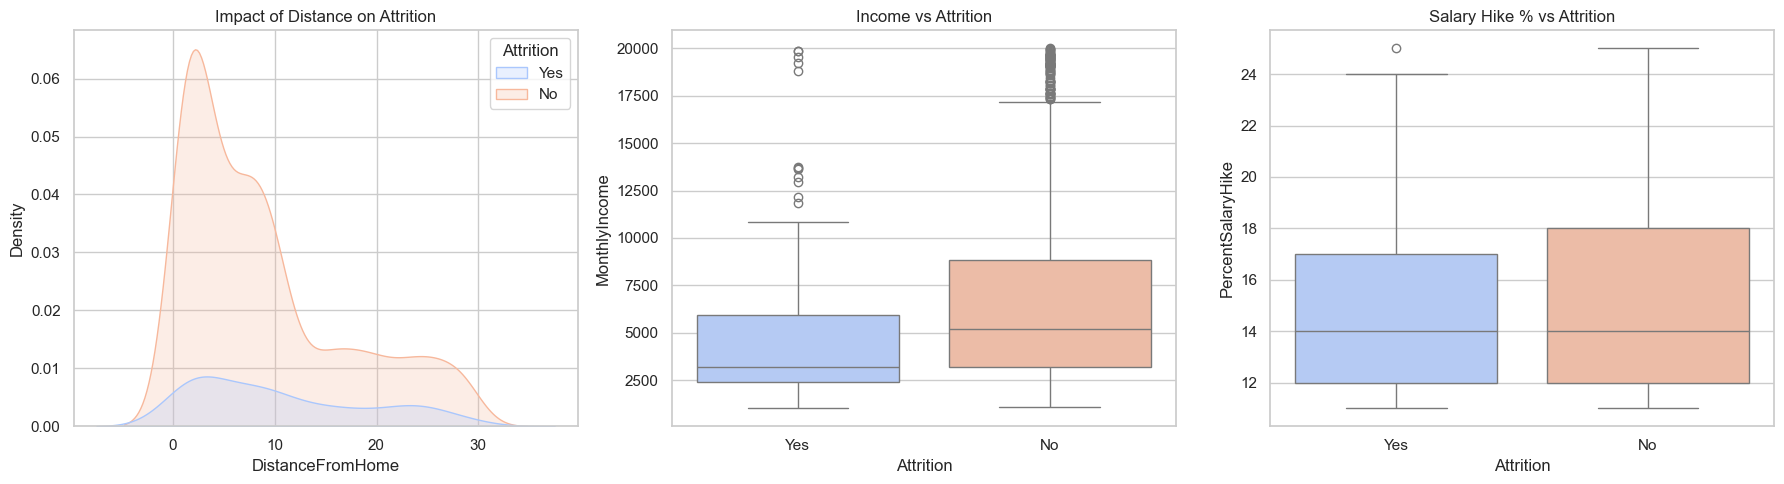

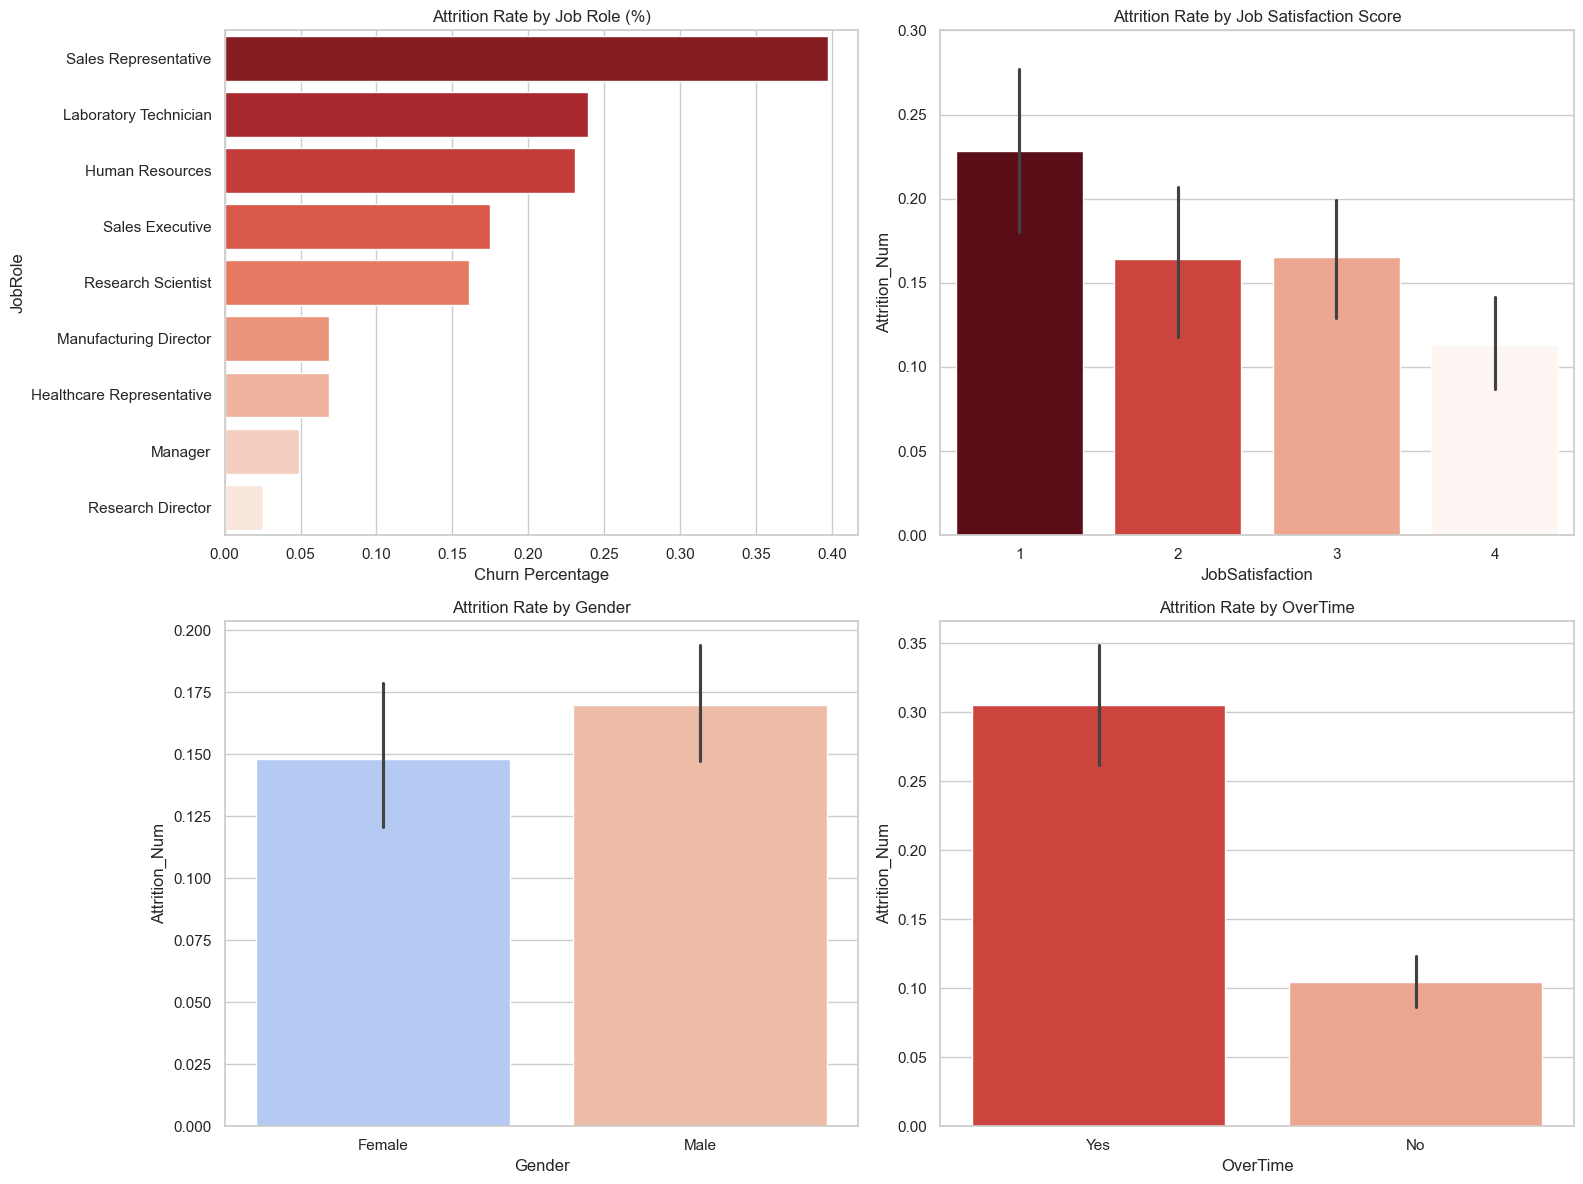

In [82]:
if df['Attrition'].dtype == 'object':
    df['Attrition_Num'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
else:
    df['Attrition_Num'] = df['Attrition']

# --- NUMERICAL PREDICTORS ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Distance (KDE Plot no necesita corrección porque usa hue para separar curvas)
sns.kdeplot(data=df, x="DistanceFromHome", hue="Attrition", fill=True, palette="coolwarm", ax=axes[0])
axes[0].set_title("Impact of Distance on Attrition")

# 2. Income vs Attrition
sns.boxplot(
    data=df, 
    x="Attrition", 
    y="MonthlyIncome", 
    hue="Attrition", # <--- FIX
    legend=False,    # <--- FIX
    palette="coolwarm", 
    ax=axes[1]
)
axes[1].set_title("Income vs Attrition")

# 3. Salary Hike vs Attrition
sns.boxplot(
    data=df, 
    x="Attrition", 
    y="PercentSalaryHike", 
    hue="Attrition", # <--- FIX
    legend=False,    # <--- FIX
    palette="coolwarm", 
    ax=axes[2]
)
axes[2].set_title("Salary Hike % vs Attrition")

plt.tight_layout()
plt.show()


# --- CATEGORICAL PREDICTORS ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 4. Job Role Churn
role_churn = df.groupby('JobRole')['Attrition_Num'].mean().sort_values(ascending=False)
sns.barplot(
    x=role_churn.values, 
    y=role_churn.index, 
    hue=role_churn.index, # <--- FIX: Usamos el índice como hue
    legend=False, 
    palette="Reds_r", 
    ax=axes[0,0]
)
axes[0,0].set_title("Attrition Rate by Job Role (%)")
axes[0,0].set_xlabel("Churn Percentage")

# 5. Job Satisfaction Churn
sns.barplot(
    data=df, 
    x="JobSatisfaction", 
    y="Attrition_Num", 
    hue="JobSatisfaction", # <--- FIX
    legend=False, 
    palette="Reds_r", 
    ax=axes[0,1]
)
axes[0,1].set_title("Attrition Rate by Job Satisfaction Score")
axes[0,1].set_ylim(0, 0.3)

# 6. Gender Churn
sns.barplot(
    data=df, 
    x="Gender", 
    y="Attrition_Num", 
    hue="Gender", # <--- FIX
    legend=False, 
    palette="coolwarm", 
    ax=axes[1,0]
)
axes[1,0].set_title("Attrition Rate by Gender")

# 7. OverTime Churn
sns.barplot(
    data=df, 
    x="OverTime", 
    y="Attrition_Num", 
    hue="OverTime", # <--- FIX
    legend=False, 
    palette="Reds_r", 
    ax=axes[1,1]
)
axes[1,1].set_title("Attrition Rate by OverTime")

plt.tight_layout()
plt.show()

Key Insights:

### 1. The "Red Flags" (High Impact Predictors)

* **The Burnout Factor (`OverTime`):** This is arguably the strongest behavioral predictor. Employees working OverTime face a **30% attrition rate**, compared to just 10% for those who don't.
> Working overtime **triples** the risk of leaving. This suggests "Burnout" is a primary cause of turnover.


* **Role-Based Vulnerability (`JobRole`):** Churn is not evenly distributed. **Sales Representatives** are in a critical state with nearly **40% attrition**. Other technical roles (Lab Technicians, HR, Scientists) hover between 15-25%.
> Senior roles (Managers, Directors) show almost zero churn, correlating with their higher salaries.


* **Dissatisfaction (`JobSatisfaction`):** As expected, attrition peaks among employees with **Level 1 (Low)** satisfaction.
> While satisfaction didn't correlate with income, it strongly correlates with the decision to leave.



### 2. Financial Factors

* **Income Sensitivity (`MonthlyIncome`):** Money matters.
* **Pattern:** There is a clear inverse relationship: Employees who leave have a **significantly lower median income** than those who stay.


* **Hike Irrelevance (`PercentSalaryHike`):** Surprisingly, the % of the last salary raise is **not a differentiator**.
> Both groups (Stay vs. Leave) share similar distributions. A standard 11-15% hike seems to be the baseline and does not act as a strong retention tool.



### 3. Weak or Neutral Predictors (Low Information Gain)

* **Gender Neutrality:** `Gender` is **not a discriminator**. The attrition split mirrors the population (60% Male / 40% Female), meaning men and women leave at the same rate.
* **Commute Impact (`DistanceFromHome`):** Contrary to common intuition, distance does not seem to be a primary driver here.
> The distribution of distance is uniform and overlaps significantly between those who stay and those who leave.

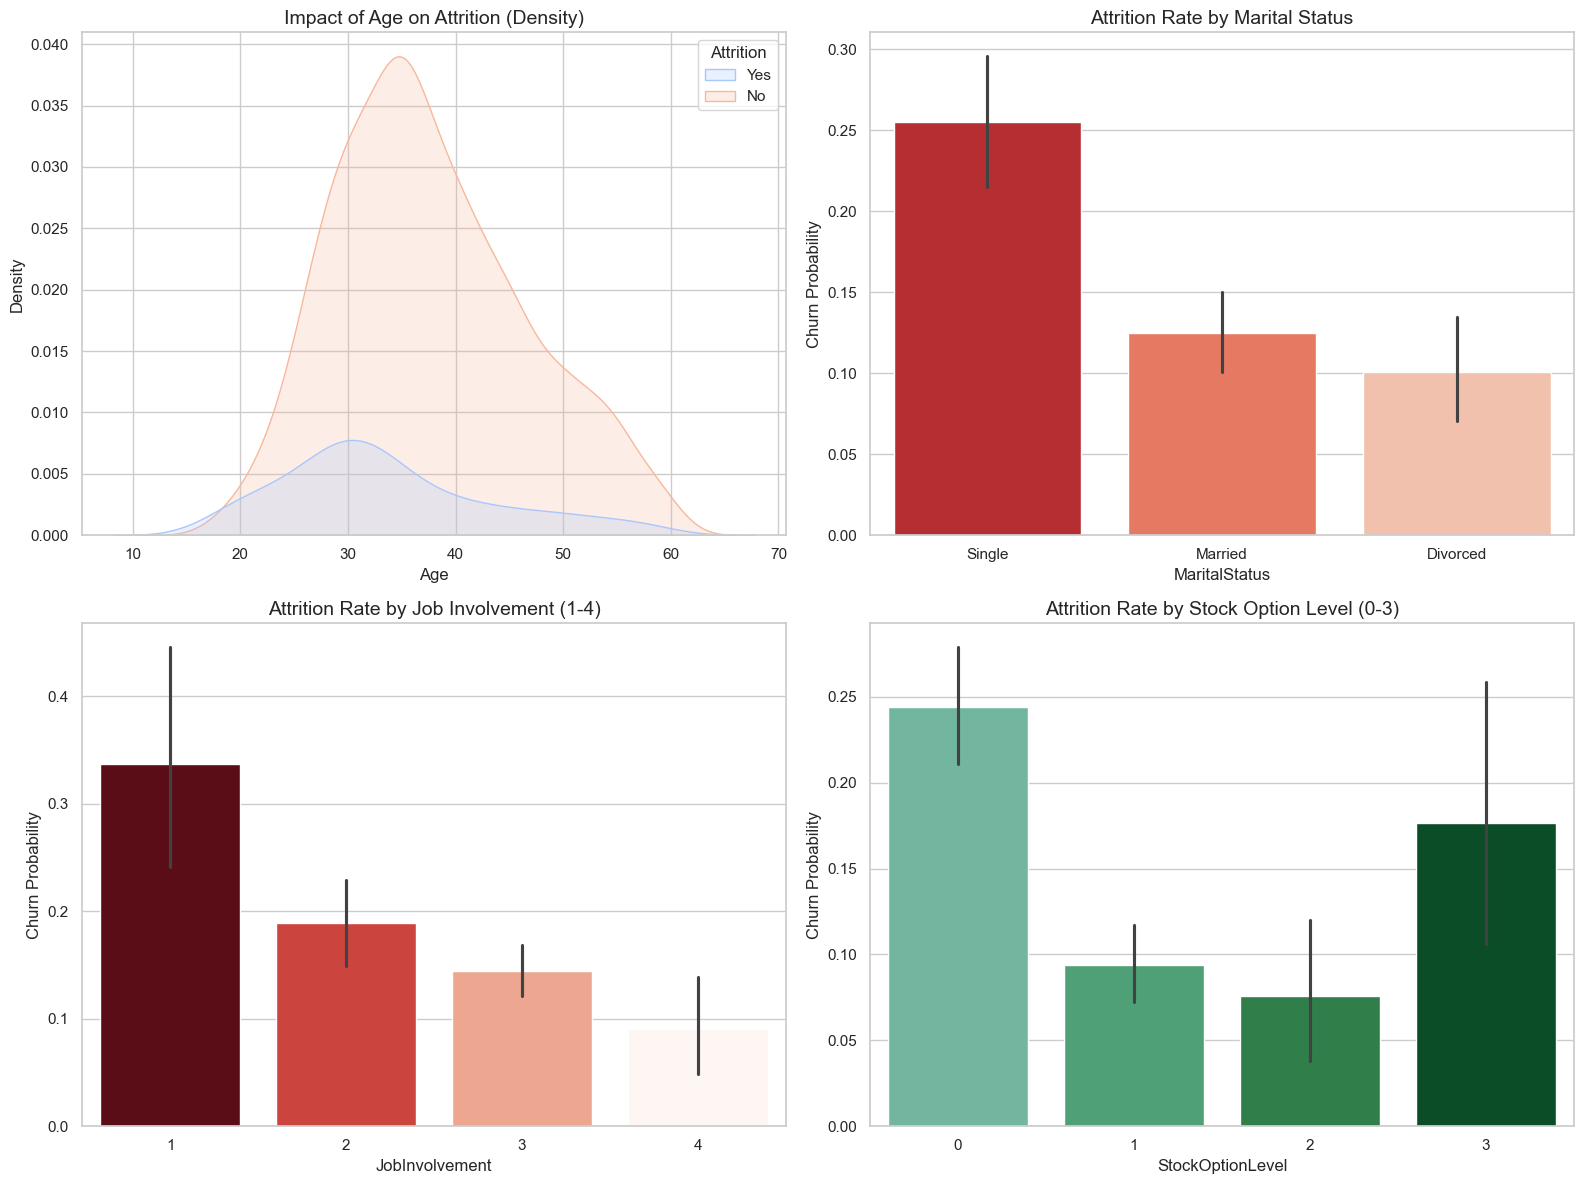

In [88]:
# Configuración del Grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. AGE (KDE Plot - Densidad)
# Are churners younger?
sns.kdeplot(
    data=df, 
    x="Age", 
    hue="Attrition", 
    fill=True, 
    palette="coolwarm", 
    ax=axes[0,0]
)
axes[0,0].set_title("Impact of Age on Attrition (Density)", fontsize=14)

# 2. MARITAL STATUS (Barplot - % de Fuga)
# Are churners single?
sns.barplot(
    data=df, 
    x="MaritalStatus", 
    y="Attrition_Num", 
    hue="MaritalStatus", 
    legend=False, 
    palette="Reds_r", 
    ax=axes[0,1]
)
axes[0,1].set_title("Attrition Rate by Marital Status", fontsize=14)
axes[0,1].set_ylabel("Churn Probability")

# 3. JOB INVOLVEMENT (Barplot - % de Fuga)
# Does level 1 JobInvolvement have more churn than level 4?
sns.barplot(
    data=df, 
    x="JobInvolvement", 
    y="Attrition_Num", 
    hue="JobInvolvement", 
    legend=False, 
    palette="Reds_r", 
    ax=axes[1,0]
)
axes[1,0].set_title("Attrition Rate by Job Involvement (1-4)", fontsize=14)
axes[1,0].set_ylabel("Churn Probability")

# 4. STOCK OPTION LEVEL (Barplot - % de Fuga)
# Issuing stocks makes churn decrease?
custom_greens = ["#66c2a4", "#41ae76", "#238b45", "#005824"]
sns.barplot(
    data=df, 
    x="StockOptionLevel", 
    y="Attrition_Num", 
    hue="StockOptionLevel", 
    legend=False, 
    palette=custom_greens, # Green because we are working with money
    ax=axes[1,1]
)
axes[1,1].set_title("Attrition Rate by Stock Option Level (0-3)", fontsize=14)
axes[1,1].set_ylabel("Churn Probability")

plt.tight_layout()
plt.show()

Key Insights:

### 1. The "Younger Demographic" Risk

* **Age Distribution Shift:** There is a clear connection between age and attrition. The density plot for those leaving (`Yes`) is shifted significantly towards the left (younger ages).
> The company struggles to retain early-career talent, whereas employees over 40 show much higher stability.



### 2. Personal Status (`MaritalStatus`)

* **Single = High Flight Risk:** **Single** employees churn at a rate of **~25%**, which is more than double the rate of Married or Divorced employees (10-12%).
> Single employees likely have fewer family commitments tying them to a specific location or stable income, making them more mobile and open to new offers.



### 3. Engagement Levels (`JobInvolvement`)

* **The Disengagement Red Flag:** There is a sharp inverse relationship between involvement and churn.
* **Critical Stat:** Employees with **Low Involvement (1)** have a massive attrition rate of **>33%**.
> Low involvement is likely a precursor to leaving (quiet quitting). High involvement acts as a strong buffer against turnover.



### 4. The "Golden Handcuffs" Anomaly (`StockOptionLevel`)

* **The U-Shaped Pattern:** The relationship is not linear.
* **Level 0 (No Stocks):** High churn (~25%). Without equity, there is less financial reason to stay.
* **Levels 1 & 2:** Retention works best here. The churn rate drops significantly (<10%), suggesting these levels provide the optimal "Golden Handcuffs."
* **Level 3 (High Stocks):** Surprisingly, churn rises again (>15%).
> This **non-linear behavior** is tricky. A linear model might get confused by the rise at Level 3. We might need to treat this variable as Categorical (One-Hot) rather than Numerical to capture this pattern correctly.

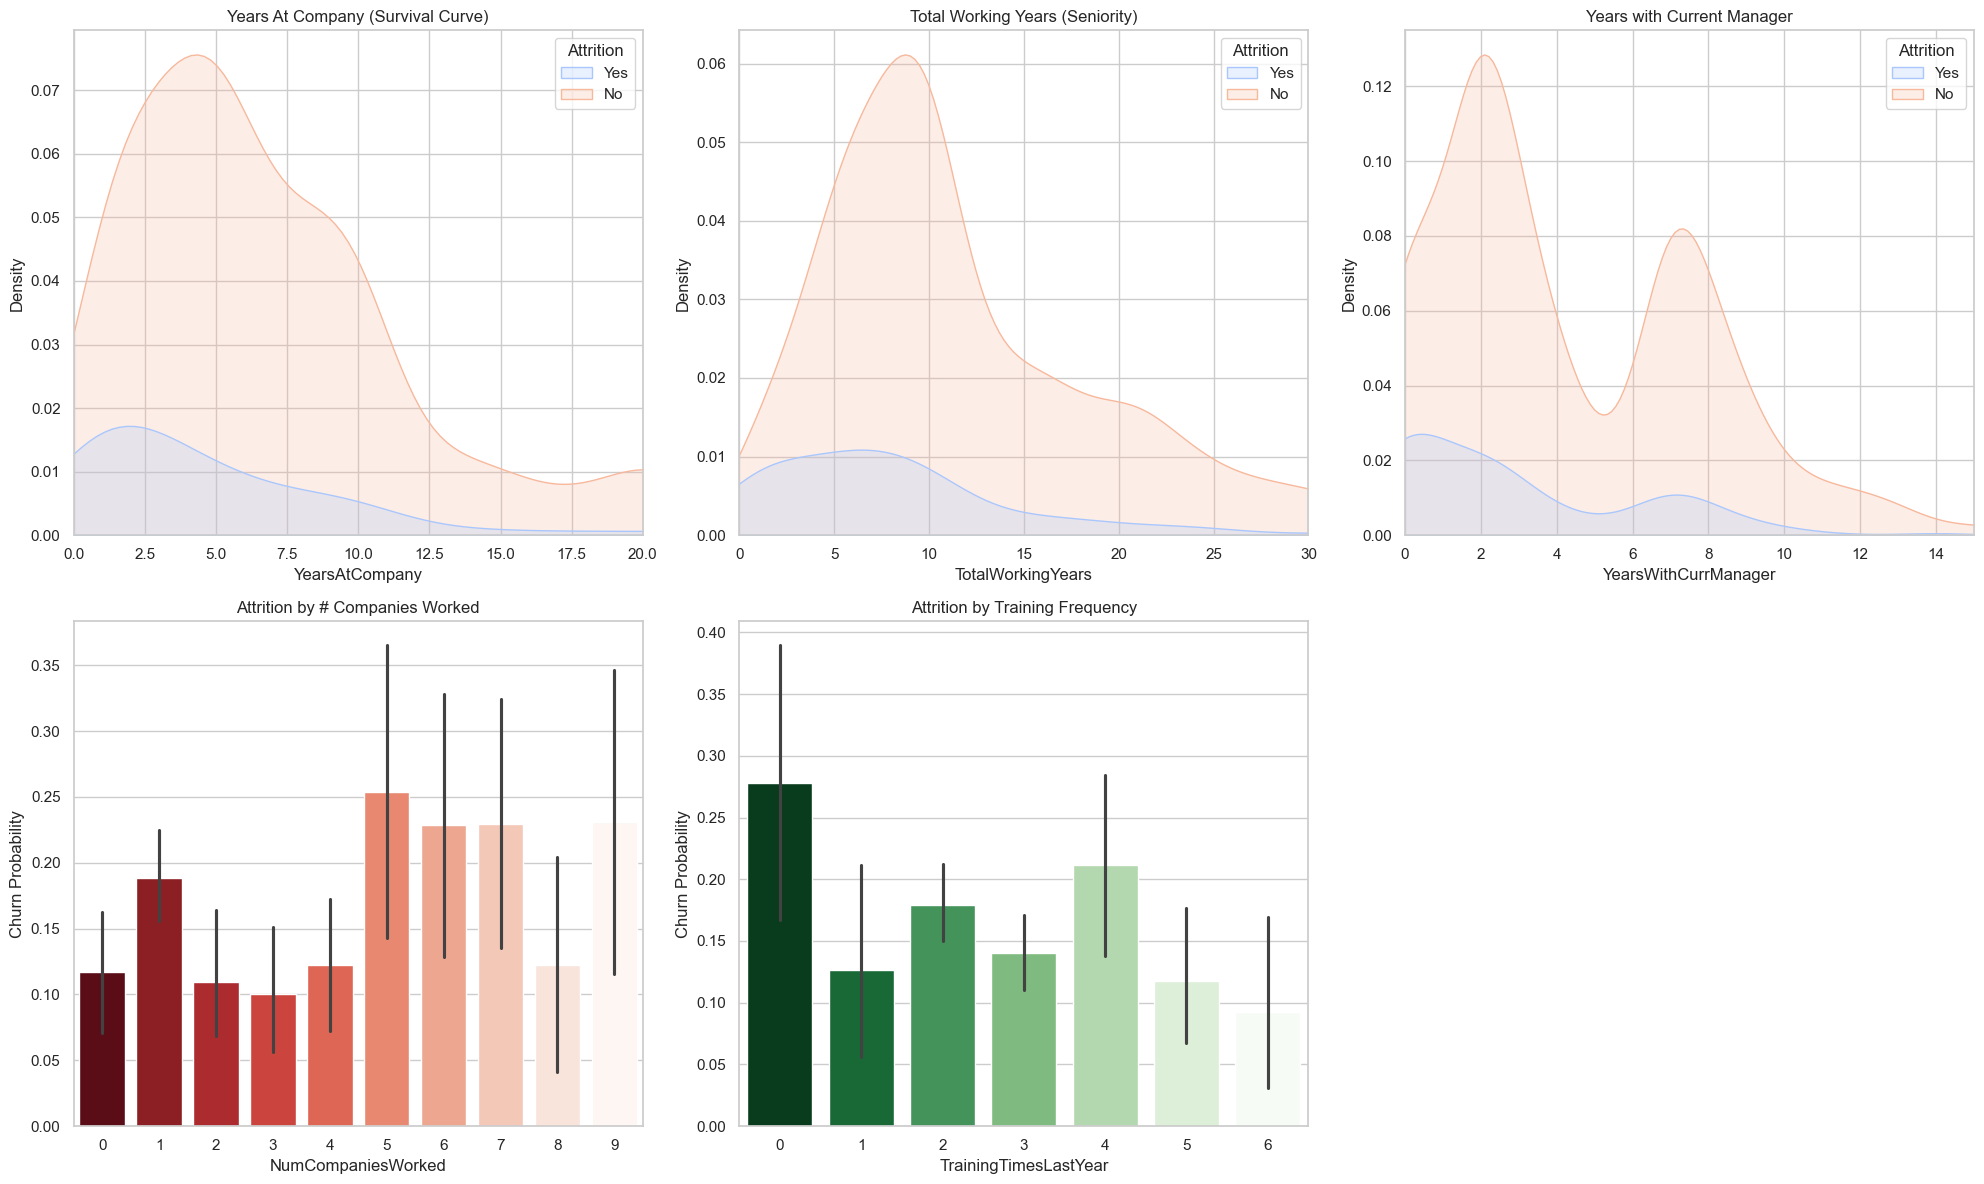

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aseguramos Attrition numérico
if df['Attrition'].dtype == 'object':
    df['Attrition_Num'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
else:
    df['Attrition_Num'] = df['Attrition']

# Configuración del Grid: 2 Filas, 3 Columnas (Para que quepan las 5)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten() # Aplanamos para acceder con índice 0, 1, 2...

# --- FILA 1: VARIABLES DE TIEMPO (CURVAS DE DENSIDAD) ---

# 1. YEARS AT COMPANY (La Curva de Supervivencia)
sns.kdeplot(
    data=df, x="YearsAtCompany", hue="Attrition", 
    fill=True, palette="coolwarm", ax=axes[0]
)
axes[0].set_title("Years At Company (Survival Curve)", fontsize=12)
axes[0].set_xlim(0, 20) # Zoom en los primeros 20 años

# 2. TOTAL WORKING YEARS (Experiencia General)
sns.kdeplot(
    data=df, x="TotalWorkingYears", hue="Attrition", 
    fill=True, palette="coolwarm", ax=axes[1]
)
axes[1].set_title("Total Working Years (Seniority)", fontsize=12)
axes[1].set_xlim(0, 30)

# 3. YEARS WITH CURRENT MANAGER (Factor Jefe)
sns.kdeplot(
    data=df, x="YearsWithCurrManager", hue="Attrition", 
    fill=True, palette="coolwarm", ax=axes[2]
)
axes[2].set_title("Years with Current Manager", fontsize=12)
axes[2].set_xlim(0, 15)


# --- FILA 2: VARIABLES DE COMPORTAMIENTO (BARRAS) ---

# 4. NUM COMPANIES WORKED (Job Hopping)
sns.barplot(
    data=df, x="NumCompaniesWorked", y="Attrition_Num", 
    hue="NumCompaniesWorked", legend=False, palette="Reds_r", ax=axes[3]
)
axes[3].set_title("Attrition by # Companies Worked", fontsize=12)
axes[3].set_ylabel("Churn Probability")

# 5. TRAINING TIMES LAST YEAR (Inversión)
sns.barplot(
    data=df, x="TrainingTimesLastYear", y="Attrition_Num", 
    hue="TrainingTimesLastYear", legend=False, palette="Greens_r", ax=axes[4]
)
axes[4].set_title("Attrition by Training Frequency", fontsize=12)
axes[4].set_ylabel("Churn Probability")

# 6. BORRAR EL HUECO VACÍO (El sexto gráfico no existe)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

### 1. Tenure & Stability Risks

* **The "Infant Mortality" Effect (`YearsAtCompany`):**
* **Observation:** While the distributions are visually similar, the "Churn" curve has a sharper peak at **0-2 years**.
> The highest risk occurs immediately after hiring. If an employee survives the first 2 years, their probability of staying increases drastically.


* **Junior vs. Senior (`TotalWorkingYears`):**
* **Observation:** Attrition is concentrated in employees with **<10 years of total experience**.
> The company acts as a "stepping stone" for Juniors to gain experience before moving on Seniors (>10 years), which are much more stable.



### 2. The Management Factor (`YearsWithCurrManager`)

* **The "Onboarding Gap" (Critical Finding):**
* **Observation:** Churners spike at **Year 0** (leaving almost immediately after getting a new manager), whereas those who stay tend to peak around **Year 2**.
> This suggests a failure in the **Manager-Employee fit** during the first months. If the relationship survives the first year, the employee is likely safe until the "7-year itch" (the second bimodal peak).



### 3. Behavioral History (`NumCompaniesWorked`)

* **The "Job Hopper" Trait:**
* **Pattern:** People who have worked at **5 or more companies** show a significantly higher attrition rate.
> Past behavior predicts future behavior. The model will learn that a high `NumCompaniesWorked` is a risk factor, regardless of how good the current salary is.



### 4. Corporate Investment (`TrainingTimesLastYear`)

* **The "Neglect" Signal:**
* **Critical Stat:** Employees with **0 training sessions** in the last year have a massive **~30% attrition rate**.
> Simply providing 1 or 2 training sessions drops the churn rate significantly. This is a highly actionable insight for HR.

## Final Veredict

Based on the complete EDA (including Loyalty & Experience analysis), the **Feature Importance** of our future model will likely look like this:

### 1. Top Tier (Strongest Predictors)

* **`OverTime`**: The #1 behavioral driver. working overtime triples the risk.

* **`MonthlyIncome`**: Strong financial driver (inverse relationship).

* **`JobInvolvement`**: Critical signal. Level 1 (Low) leads to >33% churn.

* **`JobRole`**: Highly discriminative. **Sales Reps** are "high risk," while Directors are "safe zones."

### 2. Mid Tier (Contextual & Behavioral Drivers)

* **`NumCompaniesWorked` (The "Job Hopper"):** People with **5+ previous companies** are significantly more likely to leave again.

* **`TrainingTimesLastYear` (The "Neglect" Signal):** Employees with **0 training sessions** show a massive spike in attrition (~30%).

* **`YearsWithCurrManager`:** Stronger than generic tenure. Shows a critical "Infant Mortality" spike at **Year 0** (bad onboarding/manager fit).

* **`StockOptionLevel`:** Strong but non-linear (U-Shape). Levels 0 and 3 are risky; Levels 1-2 are the "sweet spot."

* **`MaritalStatus`:** Demographic risk. **Singles** are the most volatile group.

* **`YearsAtCompany`:** Specific spikes at vesting periods (Years 0, 1, 5), though the general distribution overlaps with non-churners.

### 3. Low Tier (Noise / Redundant)

* **`TotalWorkingYears`:** **High Overlap.** The distribution is nearly identical to non-churners and is likely highly correlated with `Age`, making it redundant.

* **`Gender`:** Neutral (No discrimination).

* **`PerformanceRating`:** Low variance (Only values 3 and 4).

* **`PercentSalaryHike`:** No differentiation between groups.

* **`DailyRate`, `HourlyRate`, `MonthlyRate`:** Uniform distributions (Synthetic noise).

## Final Selection of Features

In [95]:
# These would be the final columns to drop (We will keep GENDER)

DROP_COLS = [
    'EmployeeCount', 'Over18', 'StandardHours',  # Constant
    'EmployeeNumber',                            # IDs
    'DailyRate', 'HourlyRate', 'MonthlyRate',    # Noise
    'PerformanceRating', 'PercentSalaryHike'     # Low Variance
    'TotalWorkingYears', 'YearsInCurrentRole'
]

In [96]:
NUMERIC_FEATURES = [
    # --- Continuous ---
    'Age',
    'DistanceFromHome',          # Candidate to Log-Transform
    'MonthlyIncome',             # Candidate to Log-Transform
    'YearsAtCompany',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager',
    'NumCompaniesWorked',
    'TrainingTimesLastYear',

    # --- Ordinals (1-4) treated as Numeric ---
    # We treat then as numbers because the order (4 > 1) matters matematically
    'Education',
    'EnvironmentSatisfaction',
    'JobInvolvement',            # Very important!
    'JobLevel',
    'JobSatisfaction',
    'RelationshipSatisfaction',
    'WorkLifeBalance'
]

CATEGORICAL_FEATURES = [
    'BusinessTravel',       # Non-Travel, Travel_Rarely, etc.
    'Department',           # Sales, R&D, HR
    'EducationField',       # Marketing, Life Sciences, etc.
    'JobRole',              # Sales Rep, Manager, etc. (Very important!)
    'MaritalStatus',        # Single, Married, Divorced (Very important!)
    'OverTime',             # Yes/No (Predictor #1)
    
    # --- Special Case ---
    'StockOptionLevel'      # (0, 1, 2, 3)
    # OBSERVATION: this variable will be treated better by the model as
    # categorical, because of the U relationship with the target
]

TARGET = 'Attrition'  # 0 (No) or 1 (Yes)